<a href="https://colab.research.google.com/github/saran237/assignment/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading Dataset From Drive**

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB #bayes theorum
from sklearn.svm import SVC #support vector machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #for decision tree
from sklearn.ensemble import RandomForestClassifier # for random forest

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/DSA/Excel_downloads/Training_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DSA/Excel_downloads/Testing_data.csv')
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


# **Exploratory Data Analysis (EDA)**

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
df_train.duplicated().sum()
df_test.duplicated().sum()

np.int64(0)

In [7]:
df_train.T.duplicated().sum()
df_test.T.duplicated().sum()

np.int64(0)

In [8]:
df_train.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [9]:
df_test.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'],errors='coerce')
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'],errors='coerce')

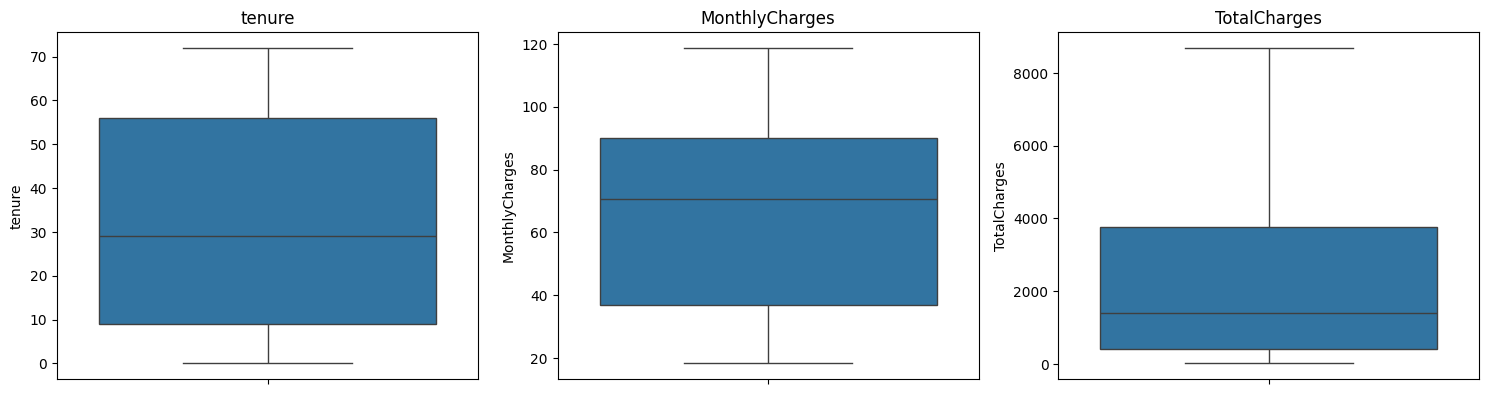

In [11]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)  # Arrange subplots in a 4x4 grid
    sns.boxplot(y=df_train[col])   # Boxplot for the current column
    plt.title(col)           # Set column name as the title
plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()

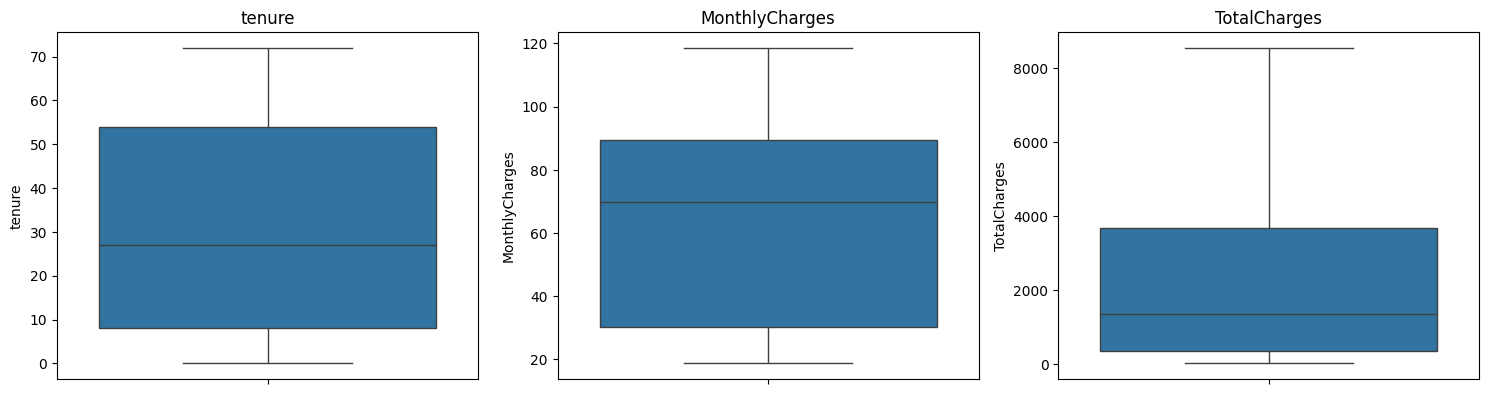

In [12]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)  # Arrange subplots in a 4x4 grid
    sns.boxplot(y=df_test[col])   # Boxplot for the current column
    plt.title(col)           # Set column name as the title
plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()

--- Correlation Matrix ---
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.241236      0.824405
MonthlyCharges  0.241236        1.000000      0.650309
TotalCharges    0.824405        0.650309      1.000000


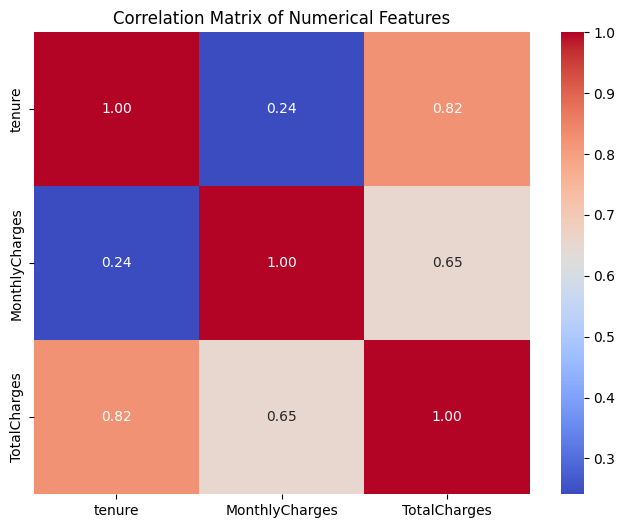

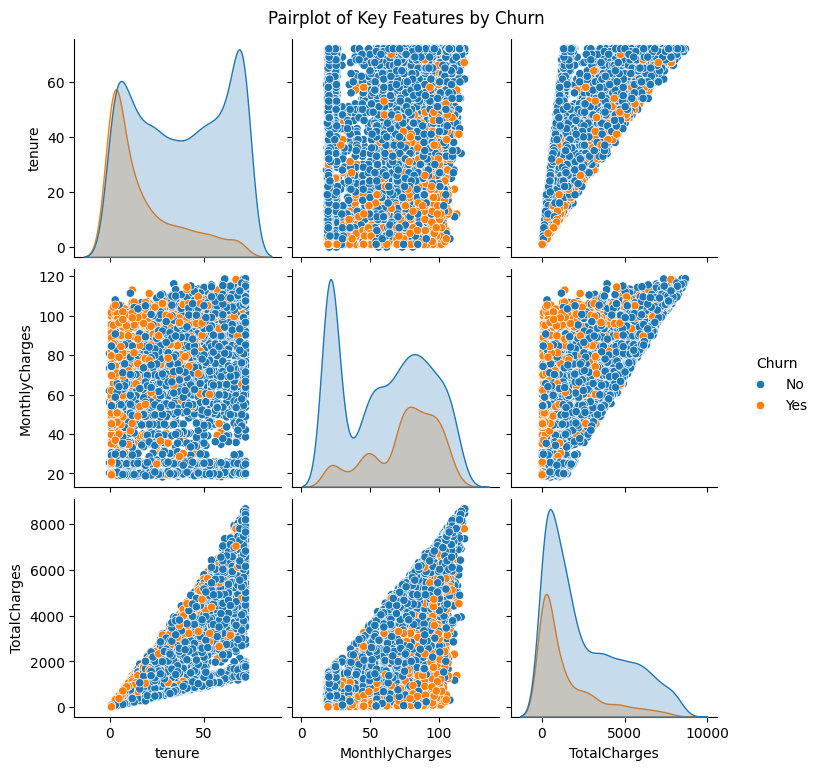

<Figure size 700x400 with 0 Axes>

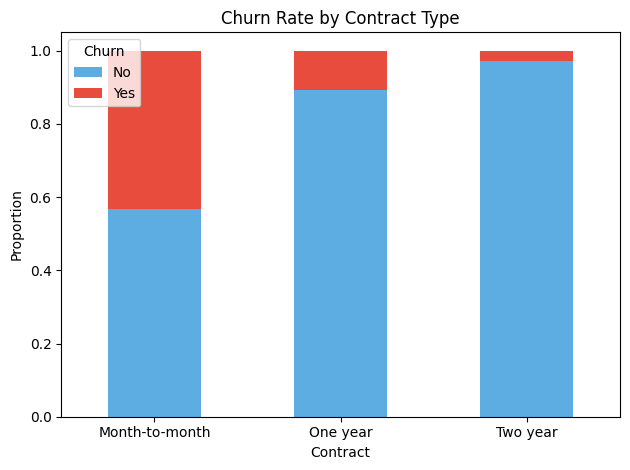

In [13]:
# Calculate the correlation matrix
correlation_matrix = df_train[num].corr()
# Print the correlation matrix
print("--- Correlation Matrix ---")
print(correlation_matrix)
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 2. Pairplot
sns.pairplot(df_train[num + ['Churn']], hue='Churn', diag_kind='kde')
plt.suptitle("Pairplot of Key Features by Churn", y=1.02)
plt.show()


# 3. Interesting pattern: Contract vs Churn
plt.figure(figsize=(7, 4))
contract_churn = pd.crosstab(df_train['Contract'], df_train['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, color=['#5DADE2', '#E74C3C'])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [14]:
# Drop CustomerID as it's not a feature
df_train.drop('customerID', axis=1, inplace=True)
df_test.drop('customerID', axis=1, inplace=True)

# Remove customers with tenure = 0
df_train = df_train[df_train['tenure'] > 0].reset_index(drop=True)
df_test = df_test[df_test['tenure'] > 0].reset_index(drop=True)


In [15]:
df_train.shape

(5625, 20)

In [16]:
df_test.shape

(1407, 20)

In [17]:
df_train.fillna({'gender': df_train['gender'].mode()[0]}, inplace=True)
df_train.fillna({'OnlineSecurity': df_train['OnlineSecurity'].mode()[0]}, inplace=True)
df_train.fillna({'MonthlyCharges': df_train['MonthlyCharges'].mean()}, inplace=True)
df_train['TotalCharges'] = df_train['TotalCharges'].fillna(df_train['MonthlyCharges'] * df_train['tenure'])


In [18]:
df_test.fillna({'gender': df_test['gender'].mode()[0]}, inplace=True)
df_test.fillna({'OnlineSecurity': df_test['OnlineSecurity'].mode()[0]}, inplace=True)
df_test.fillna({'MonthlyCharges': df_test['MonthlyCharges'].mean()}, inplace=True)
df_test['TotalCharges'] = df_test['TotalCharges'].fillna(df_test['MonthlyCharges'] * df_test['tenure'])

In [19]:
df_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5621,Male,1,Yes,No,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5622,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5623,Female,0,No,No,69,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30,No


In [20]:
df_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,No
1,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,Female,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,Male,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1403,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.40,Yes
1404,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1405,Male,0,Yes,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [21]:
df_train.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### Handle outliers

In [22]:
# num = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df_train[num].quantile(0.25)          # 25th percentile
Q3 = df_train[num].quantile(0.75)          # 75th percentile
IQR = Q3 - Q1                                 # Interquartile Range
low_limit = Q1 - 1.5 * IQR                    # Lower bound for outliers
up_limit = Q3 + 1.5 * IQR                     # Upper bound for outliers
print("Q1:\n", Q1, "\n\nQ3:\n", Q3, "\n\nIQR:\n", IQR, "\n\nLower Limit:\n", low_limit, "\n\nUpper Limit:\n", up_limit)




Q1:
 tenure              9.00
MonthlyCharges     44.05
TotalCharges      415.10
Name: 0.25, dtype: float64 

Q3:
 tenure              56.00
MonthlyCharges      89.15
TotalCharges      3814.35
Name: 0.75, dtype: float64 

IQR:
 tenure              47.00
MonthlyCharges      45.10
TotalCharges      3399.25
dtype: float64 

Lower Limit:
 tenure             -61.500
MonthlyCharges     -23.600
TotalCharges     -4683.775
dtype: float64 

Upper Limit:
 tenure             126.500
MonthlyCharges     156.800
TotalCharges      8913.225
dtype: float64


In [23]:
# num = ['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df_test[num].quantile(0.25)          # 25th percentile
Q3 = df_test[num].quantile(0.75)          # 75th percentile
IQR = Q3 - Q1                                 # Interquartile Range
low_limit = Q1 - 1.5 * IQR                    # Lower bound for outliers
up_limit = Q3 + 1.5 * IQR                     # Upper bound for outliers
print("Q1:\n", Q1, "\n\nQ3:\n", Q3, "\n\nIQR:\n", IQR, "\n\nLower Limit:\n", low_limit, "\n\nUpper Limit:\n", up_limit)

Q1:
 tenure              8.000
MonthlyCharges     30.300
TotalCharges      358.625
Name: 0.25, dtype: float64 

Q3:
 tenure              54.000
MonthlyCharges      89.500
TotalCharges      3679.275
Name: 0.75, dtype: float64 

IQR:
 tenure              46.00
MonthlyCharges      59.20
TotalCharges      3320.65
dtype: float64 

Lower Limit:
 tenure             -61.00
MonthlyCharges     -58.50
TotalCharges     -4622.35
dtype: float64 

Upper Limit:
 tenure             123.00
MonthlyCharges     178.30
TotalCharges      8660.25
dtype: float64


In [24]:
non_outliers = ~((df_train[num] < low_limit) | (df_train[num] > up_limit))
outliers_removed = ~((df_test[num] < low_limit) | (df_test[num] > up_limit))

In [25]:
# Filter out rows where any of the numerical columns have outliers
train_new = df_train[non_outliers.all(axis=1)]
test_new  = df_test[outliers_removed.all(axis=1)]

In [26]:
df_train.shape

(5625, 20)

In [27]:
train_new.shape

(5622, 20)

In [28]:
df_test.shape

(1407, 20)

In [29]:
test_new.shape

(1407, 20)

In [30]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1407 non-null   object 
 1   SeniorCitizen     1407 non-null   int64  
 2   Partner           1407 non-null   object 
 3   Dependents        1407 non-null   object 
 4   tenure            1407 non-null   int64  
 5   PhoneService      1407 non-null   object 
 6   MultipleLines     1407 non-null   object 
 7   InternetService   1407 non-null   object 
 8   OnlineSecurity    1407 non-null   object 
 9   OnlineBackup      1407 non-null   object 
 10  DeviceProtection  1407 non-null   object 
 11  TechSupport       1407 non-null   object 
 12  StreamingTV       1407 non-null   object 
 13  StreamingMovies   1407 non-null   object 
 14  Contract          1407 non-null   object 
 15  PaperlessBilling  1407 non-null   object 
 16  PaymentMethod     1407 non-null   object 


In [31]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5622 entries, 0 to 5624
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5622 non-null   object 
 1   SeniorCitizen     5622 non-null   int64  
 2   Partner           5622 non-null   object 
 3   Dependents        5622 non-null   object 
 4   tenure            5622 non-null   int64  
 5   PhoneService      5622 non-null   object 
 6   MultipleLines     5622 non-null   object 
 7   InternetService   5622 non-null   object 
 8   OnlineSecurity    5622 non-null   object 
 9   OnlineBackup      5622 non-null   object 
 10  DeviceProtection  5622 non-null   object 
 11  TechSupport       5622 non-null   object 
 12  StreamingTV       5622 non-null   object 
 13  StreamingMovies   5622 non-null   object 
 14  Contract          5622 non-null   object 
 15  PaperlessBilling  5622 non-null   object 
 16  PaymentMethod     5622 non-null   object 
 17  

In [32]:
train_new['tenure'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['tenure']])
train_new['MonthlyCharges'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['MonthlyCharges']])
train_new['TotalCharges'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['TotalCharges']])
train_new

/tmp/ipython-input-3311681337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['tenure'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['tenure']])
/tmp/ipython-input-3311681337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new['MonthlyCharges'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['MonthlyCharges']])
/tmp/ipython-input-3311681337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,0.478873,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.024900,0.079482,No
1,Female,0,No,No,0.380282,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,0.174303,0.109911,No
2,Male,0,No,No,0.774648,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.800299,0.648611,No
3,Male,0,Yes,No,0.535211,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0.021912,0.089924,No
4,Female,0,Yes,Yes,0.591549,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0.328685,0.248701,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,Male,0,No,No,0.704225,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.804283,0.585304,No
5621,Male,1,Yes,No,0.943662,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,0.236056,0.343640,No
5622,Male,0,Yes,Yes,1.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.016932,0.152060,No
5623,Female,0,No,No,0.957746,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.639442,0.645609,No


In [33]:
test_new['tenure'] = MinMaxScaler(feature_range=(0,1)).fit_transform(test_new[['tenure']])
test_new['MonthlyCharges'] = MinMaxScaler(feature_range=(0,1)).fit_transform(test_new[['MonthlyCharges']])
test_new['TotalCharges'] = MinMaxScaler(feature_range=(0,1)).fit_transform(test_new[['TotalCharges']])
test_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,0.549296,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.625626,0.383837,No
1,Female,0,Yes,No,0.154930,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,0.602102,0.100600,No
2,Male,0,No,No,0.591549,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,0.813814,0.491625,Yes
3,Male,0,No,No,1.000000,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,0.995996,1.000000,No
4,Female,0,No,No,0.126761,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,0.175676,0.041649,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,Male,0,No,No,0.366197,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),0.367868,0.171059,No
1403,Female,1,No,No,0.014085,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.568068,0.016369,Yes
1404,Female,0,Yes,No,0.028169,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0.565065,0.023211,Yes
1405,Male,0,Yes,Yes,0.732394,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0.015015,0.123043,No


In [34]:
for col in train_new.select_dtypes(include=['object','category']).columns:
  print(col,train_new[col].unique())

gender ['Female' 'Male']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['No' 'DSL' 'Fiber optic']
OnlineSecurity ['No internet service' 'No' 'Yes']
OnlineBackup ['No internet service' 'No' 'Yes']
DeviceProtection ['No internet service' 'Yes' 'No']
TechSupport ['No internet service' 'Yes' 'No']
StreamingTV ['No internet service' 'No' 'Yes']
StreamingMovies ['No internet service' 'No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [35]:
# Identify binary and multi-class categorical columns (excluding 'Churn')
binary_cols = [col for col in train_new.select_dtypes(include=['object', 'category']).columns if train_new[col].nunique() == 2 and col != 'Churn']
multiclass_cols = [col for col in train_new.select_dtypes(include=['object', 'category']).columns if train_new[col].nunique() > 2 and col != 'Churn']

# Apply LabelEncoder to binary columns
encoder = LabelEncoder()
for col in binary_cols:
    train_new[col] = encoder.fit_transform(train_new[col])




/tmp/ipython-input-3055561540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[col] = encoder.fit_transform(train_new[col])
/tmp/ipython-input-3055561540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new[col] = encoder.fit_transform(train_new[col])
/tmp/ipython-input-3055561540.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [36]:
# Identify binary and multi-class categorical columns (excluding 'Churn')
bin_cols = [col for col in test_new.select_dtypes(include=['object', 'category']).columns if test_new[col].nunique() == 2 and col != 'Churn']
multi_cols = [col for col in test_new.select_dtypes(include=['object', 'category']).columns if test_new[col].nunique() > 2 and col != 'Churn']

# Apply LabelEncoder to binary columns
encoder = LabelEncoder()
for col in binary_cols:
    test_new[col] = encoder.fit_transform(test_new[col])

In [37]:
# Apply OneHotEncoder to multi-class columns
train_new = pd.get_dummies(train_new, columns=multiclass_cols, dtype=int, drop_first=True)

# Check the result
print("DataFrame after One-Hot Encoding multi-class columns:")
display(train_new.head())

DataFrame after One-Hot Encoding multi-class columns:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.478873,1,0,0.024900,0.079482,No,...,0,1,0,1,0,1,0,0,0,1
1,0,0,0,0,0.380282,0,1,0.174303,0.109911,No,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0.774648,1,0,0.800299,0.648611,No,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,0,0.535211,1,1,0.021912,0.089924,No,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,1,0.591549,0,1,0.328685,0.248701,No,...,1,0,1,0,0,1,0,0,0,0


In [38]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5622 entries, 0 to 5624
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5622 non-null   int64  
 1   SeniorCitizen                          5622 non-null   int64  
 2   Partner                                5622 non-null   int64  
 3   Dependents                             5622 non-null   int64  
 4   tenure                                 5622 non-null   float64
 5   PhoneService                           5622 non-null   int64  
 6   PaperlessBilling                       5622 non-null   int64  
 7   MonthlyCharges                         5622 non-null   float64
 8   TotalCharges                           5622 non-null   float64
 9   Churn                                  5622 non-null   object 
 10  MultipleLines_No phone service         5622 non-null   int64  
 11  MultipleL

In [39]:
# Apply OneHotEncoder to multi-class columns
test_new = pd.get_dummies(test_new, columns=multi_cols, dtype=int, drop_first=True)

# Check the result
print("DataFrame after One-Hot Encoding multi-class columns:")
test_new

DataFrame after One-Hot Encoding multi-class columns:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,0.549296,1,1,0.625626,0.383837,No,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0.154930,1,0,0.602102,0.100600,No,...,0,0,1,0,1,1,0,0,1,0
2,1,0,0,0,0.591549,1,1,0.813814,0.491625,Yes,...,1,0,1,0,1,1,0,0,1,0
3,1,0,0,0,1.000000,1,1,0.995996,1.000000,No,...,1,0,1,0,1,0,1,0,1,0
4,0,0,0,0,0.126761,0,0,0.175676,0.041649,No,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1,0,0,0,0.366197,1,0,0.367868,0.171059,No,...,0,0,0,0,0,1,0,0,0,0
1403,0,1,0,0,0.014085,1,1,0.568068,0.016369,Yes,...,0,0,0,0,0,0,0,0,0,1
1404,0,0,1,0,0.028169,1,1,0.565065,0.023211,Yes,...,0,0,0,0,0,0,0,1,0,0
1405,1,0,1,1,0.732394,1,0,0.015015,0.123043,No,...,0,1,0,1,0,1,0,1,0,0


In [40]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 1407 non-null   int64  
 1   SeniorCitizen                          1407 non-null   int64  
 2   Partner                                1407 non-null   int64  
 3   Dependents                             1407 non-null   int64  
 4   tenure                                 1407 non-null   float64
 5   PhoneService                           1407 non-null   int64  
 6   PaperlessBilling                       1407 non-null   int64  
 7   MonthlyCharges                         1407 non-null   float64
 8   TotalCharges                           1407 non-null   float64
 9   Churn                                  1407 non-null   object 
 10  MultipleLines_No phone service         1407 non-null   int64  
 11  Mult

In [41]:
# Encode target variable
train_new['Churn'] = train_new['Churn'].map({'Yes': 1, 'No': 0})

test_new['Churn'] = test_new['Churn'].map({'Yes': 1, 'No': 0})


# **Feature Engineering**

In [42]:
# ---- Tenure Group ----
bins = [-1, 12, 24, 48, 72, 120]
labels = ['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs', '6+ yrs']
train_new['TenureGroup'] = pd.cut(df_train['tenure'], bins=bins, labels=labels)
test_new['TenureGroup'] = pd.cut(df_test['tenure'], bins=bins, labels=labels)

# ---- CLV (Customer Lifetime Value) ----
train_new['CLV'] = df_train['tenure'] * df_train['MonthlyCharges']
test_new['CLV'] = df_test['tenure'] * df_test['MonthlyCharges']

In [43]:
# One-hot encode the TenureGroup column
train_new = pd.get_dummies(train_new, columns=['TenureGroup'], dtype=int)
test_new = pd.get_dummies(test_new, columns=['TenureGroup'], dtype=int)

#scale the customer lifetime value column
train_new['CLV'] = MinMaxScaler(feature_range=(0,1)).fit_transform(train_new[['CLV']])
test_new['CLV'] = MinMaxScaler(feature_range=(0,1)).fit_transform(test_new[['CLV']])




In [44]:
train_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CLV,TenureGroup_0-1 yr,TenureGroup_1-2 yrs,TenureGroup_2-4 yrs,TenureGroup_4-6 yrs,TenureGroup_6+ yrs
0,0,0,0,0,0.478873,1,0,0.024900,0.079482,0,...,0,0,0,1,0.084161,0,0,1,0,0
1,0,0,0,0,0.380282,0,1,0.174303,0.109911,0,...,0,0,0,1,0.116849,0,0,1,0,0
2,1,0,0,0,0.774648,1,0,0.800299,0.648611,0,...,0,0,1,0,0.654676,0,0,0,1,0
3,1,0,1,0,0.535211,1,1,0.021912,0.089924,0,...,1,0,0,0,0.092644,0,0,1,0,0
4,0,0,1,1,0.591549,0,1,0.328685,0.248701,0,...,0,0,0,0,0.259943,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,1,0,0,0,0.704225,1,1,0.804283,0.585304,0,...,0,0,1,0,0.598450,0,0,0,1,0
5621,1,1,1,0,0.943662,0,1,0.236056,0.343640,0,...,1,0,1,0,0.337138,0,0,0,1,0
5622,1,0,1,1,1.000000,1,0,0.016932,0.152060,0,...,1,0,0,0,0.168650,0,0,0,1,0
5623,0,0,0,0,0.957746,1,1,0.639442,0.645609,0,...,1,1,0,0,0.674598,0,0,0,1,0


# **Model Building**

In [45]:
X_train = train_new.drop(columns=["Churn"])
y_train = train_new["Churn"]

X_test  = test_new.drop(columns=["Churn"])
y_test  = test_new["Churn"]


## Logistic Regression

In [46]:
#building Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)#training the model
y_pred = log_reg_model.predict(X_test)#predicting the test data
#evaluate the model
accuracy_lr = accuracy_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred,average='weighted')
recall_lr = recall_score(y_test,y_pred,average='weighted')

print("Accuracy : ",accuracy_lr)
print("Precision : ",precision_lr)
print("Recall : ",recall_lr)

Accuracy :  0.8194740582800284
Precision :  0.8102832407885727
Recall :  0.8194740582800284


## KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)#training the model
y_pred_knn=knn.predict(X_test)#prediction
#evaluate the model
accuracy_knn = accuracy_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn,average='weighted')
recall_knn = recall_score(y_test,y_pred_knn,average='weighted')

print("Accuracy : ",accuracy_knn)
print("Precision : ",precision_knn)
print("Recall : ",recall_knn)

Accuracy :  0.7611940298507462
Precision :  0.7566674889652223
Recall :  0.7611940298507462


## Random Forest

In [48]:
# Random Forest
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)#training the model
y_pred_rf=rf_model.predict(X_test)#prediction
#Evaluation
accuracy_rf=accuracy_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf,average='weighted')
recall_rf=recall_score(y_test,y_pred_rf,average='weighted')

print("Accuracy : ",accuracy_rf)
print("Precision : ",precision_rf)
print("Recall : ",recall_rf)


Accuracy :  0.7896233120113717
Precision :  0.7767679468358527
Recall :  0.7896233120113717


## Comparison of Models

In [49]:
# #create a dictionary to store the evaluation matrices
# metrics = {
#     'Logistic Regression': [accuracy, precision, recall],
#     'k-NN': [accuracy_knn, precision_knn, recall_knn],
#     'Random Forest': [accuracy_rf, precision_rf, recall_rf]
# }

# #create a pandas dataframe from the evaluation matrices
# df_metrics = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall'])

# #print the dataframe
# df_metrics


metrics = {
    'Model': ['Logistic Regression', 'KNN','Random Forest'],
    'Accuracy': [accuracy_lr,accuracy_knn,accuracy_rf],
    'Precision': [precision_lr, precision_knn,precision_rf],
    'Recall': [recall_lr, recall_knn,recall_rf]
}

metrics_df = pd.DataFrame(metrics) # Create a pandas DataFrame from the dictionary
metrics_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.819474,0.810283,0.819474
1,KNN,0.761194,0.756667,0.761194
2,Random Forest,0.789623,0.776768,0.789623


In [57]:

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],   # number of trees
    "max_depth": [5, 10, 15, None],    # depth of each tree
    "min_samples_split": [2, 5, 10],   # min samples to split a node
    "min_samples_leaf": [1, 2, 4]      # min samples per leaf
}

# Grid Search (try every combination)
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=3,
                    scoring="roc_auc",
                    n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score (ROC-AUC):", grid.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score (ROC-AUC): 0.8452640724862488


In [56]:
best_model = grid.best_estimator_
# Business Impact
# Churners are the most important group to detect ⚡.
# If you fail to identify them (low recall), the company loses them without giving retention offers.

# y_test_pred = best_model.predict(X_test)
# y_test_proba = best_model.predict_proba(X_test)[:,1]

# print(classification_report(y_test, y_test_pred))
# print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))#ROC-AUC=Probability that the model ranks a random churner higher than a non-churner


# Get predicted probabilities
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Set custom threshold (default = 0.5)
threshold = 0.3
y_test_pred_custom = (y_test_proba >= threshold).astype(int)

# Evaluate again
print("Classification Report (Threshold=0.3):")
print(classification_report(y_test, y_test_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))

Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1042
           1       0.50      0.76      0.60       365

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.74      0.75      1407

ROC-AUC: 0.8252359792811506


Class 0 (Non-Churners)

Precision = 0.82 → Out of all customers predicted as not churning, 82% were truly non-churners.

Recall = 0.92 → Model correctly identified 92% of all actual non-churners.

F1-score = 0.87 → Balance of precision & recall is strong.

Interpretation: Model is very good at recognizing loyal customers.


 Class 1 (Churners)

Precision = 0.66 → Out of all customers predicted as churners, 66% actually churned.

Recall = 0.44 → Model only caught 44% of true churners.

F1-score = 0.53 → Weak balance due to low recall.

 Interpretation: Model misses more than half of the churners (false negatives).


 Overall Performance

Accuracy = 0.80 (80%) → Out of 1407 test samples, 80% predicted correctly.

Macro Avg Recall = 0.68 → Average recall across both classes (shows imbalance effect).

Weighted Avg = 0.78 → Adjusted for class sizes, overall F1 ~0.78.


 ROC-AUC = 0.825

Probability the model ranks a random churner higher than a random non-churner.

0.825 = strong discrimination ability (much better than random guessing = 0.5).